In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Mount Google drive so dataset can be accessed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


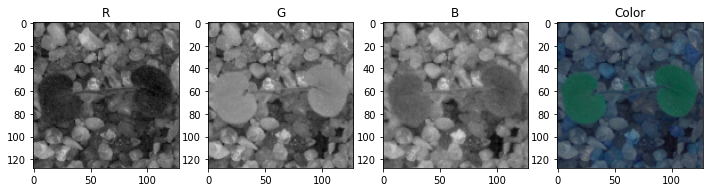

(4750, 128, 128, 3)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
images=np.load('/content/drive/My Drive/Colab Notebooks/images.npy')
#images=np.load('./images.npy')
fig=plt.figure(figsize=(12,48))
layer={0:'R',1:'G',2:'B',3:'Color'}
for i in range(4):
  if i!=3:
    img=images[0][:,:,i]
  else:
    img=images[0]
  fig.add_subplot(1,4,i+1)
  plt.title(layer[i])
  plt.imshow(img, cmap='gray')
plt.show();

print(images.shape)

Images are in color and 128*128 in size. There are 4750 in the set.

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')
#df=pd.read_csv('./Labels.csv')
df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [ ]:
print(images[0].flatten())
print(images[0].flatten().shape) #49152 = 128*128*3
flattenedimages=[]
for i in images:
  flattenedimages.append(i.flatten())
series=pd.Series(flattenedimages, name='Array(s)')

df[series.name] = series
df.head()

[35 52 78 ... 61 79 96]
(49152,)


,Label,Array(s)
0,Small-flowered Cranesbill,"[35, 52, 78, 36, 49, 76, 31, 45, 69, 43, 58, 7..."
1,Small-flowered Cranesbill,"[30, 47, 63, 30, 50, 60, 34, 47, 63, 23, 31, 4..."
2,Small-flowered Cranesbill,"[154, 149, 144, 162, 156, 152, 161, 154, 151, ..."
3,Small-flowered Cranesbill,"[49, 48, 57, 47, 48, 58, 48, 50, 56, 55, 56, 6..."
4,Small-flowered Cranesbill,"[53, 67, 80, 48, 62, 75, 43, 55, 68, 39, 49, 6..."


range(0, 12)


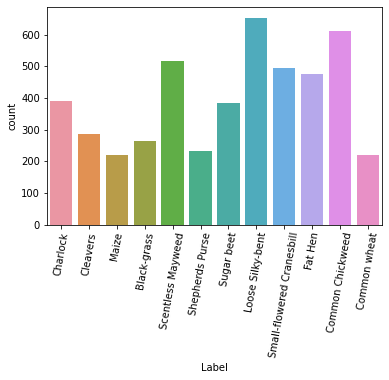

In [ ]:
import seaborn as sns
y=df['Label']

classnames=list(set(df.Label))

print(range(len(classnames)))
sns.countplot(x=y, order=classnames)
plt.xticks(rotation=80)
plt.show();

The data is imbalanced. We may need to oversample some underrepresented classes.

In [ ]:
samplerdf=df.groupby('Label', as_index=False).first()
samplerdf

,Label,Array(s)
0,Black-grass,"[27, 31, 44, 22, 33, 58, 48, 56, 70, 62, 71, 8..."
1,Charlock,"[58, 79, 95, 60, 81, 99, 66, 89, 107, 66, 90, ..."
2,Cleavers,"[28, 37, 47, 28, 35, 42, 32, 36, 42, 32, 35, 4..."
3,Common Chickweed,"[193, 186, 184, 191, 184, 180, 188, 181, 178, ..."
4,Common wheat,"[148, 148, 152, 151, 150, 151, 148, 150, 151, ..."
5,Fat Hen,"[92, 109, 118, 75, 92, 101, 84, 101, 105, 93, ..."
6,Loose Silky-bent,"[71, 89, 105, 61, 82, 101, 59, 77, 98, 30, 52,..."
7,Maize,"[41, 52, 64, 40, 51, 65, 35, 50, 69, 61, 82, 9..."
8,Scentless Mayweed,"[80, 74, 79, 79, 73, 80, 81, 75, 79, 84, 77, 8..."
9,Shepherds Purse,"[87, 117, 135, 90, 120, 138, 76, 109, 129, 80,..."


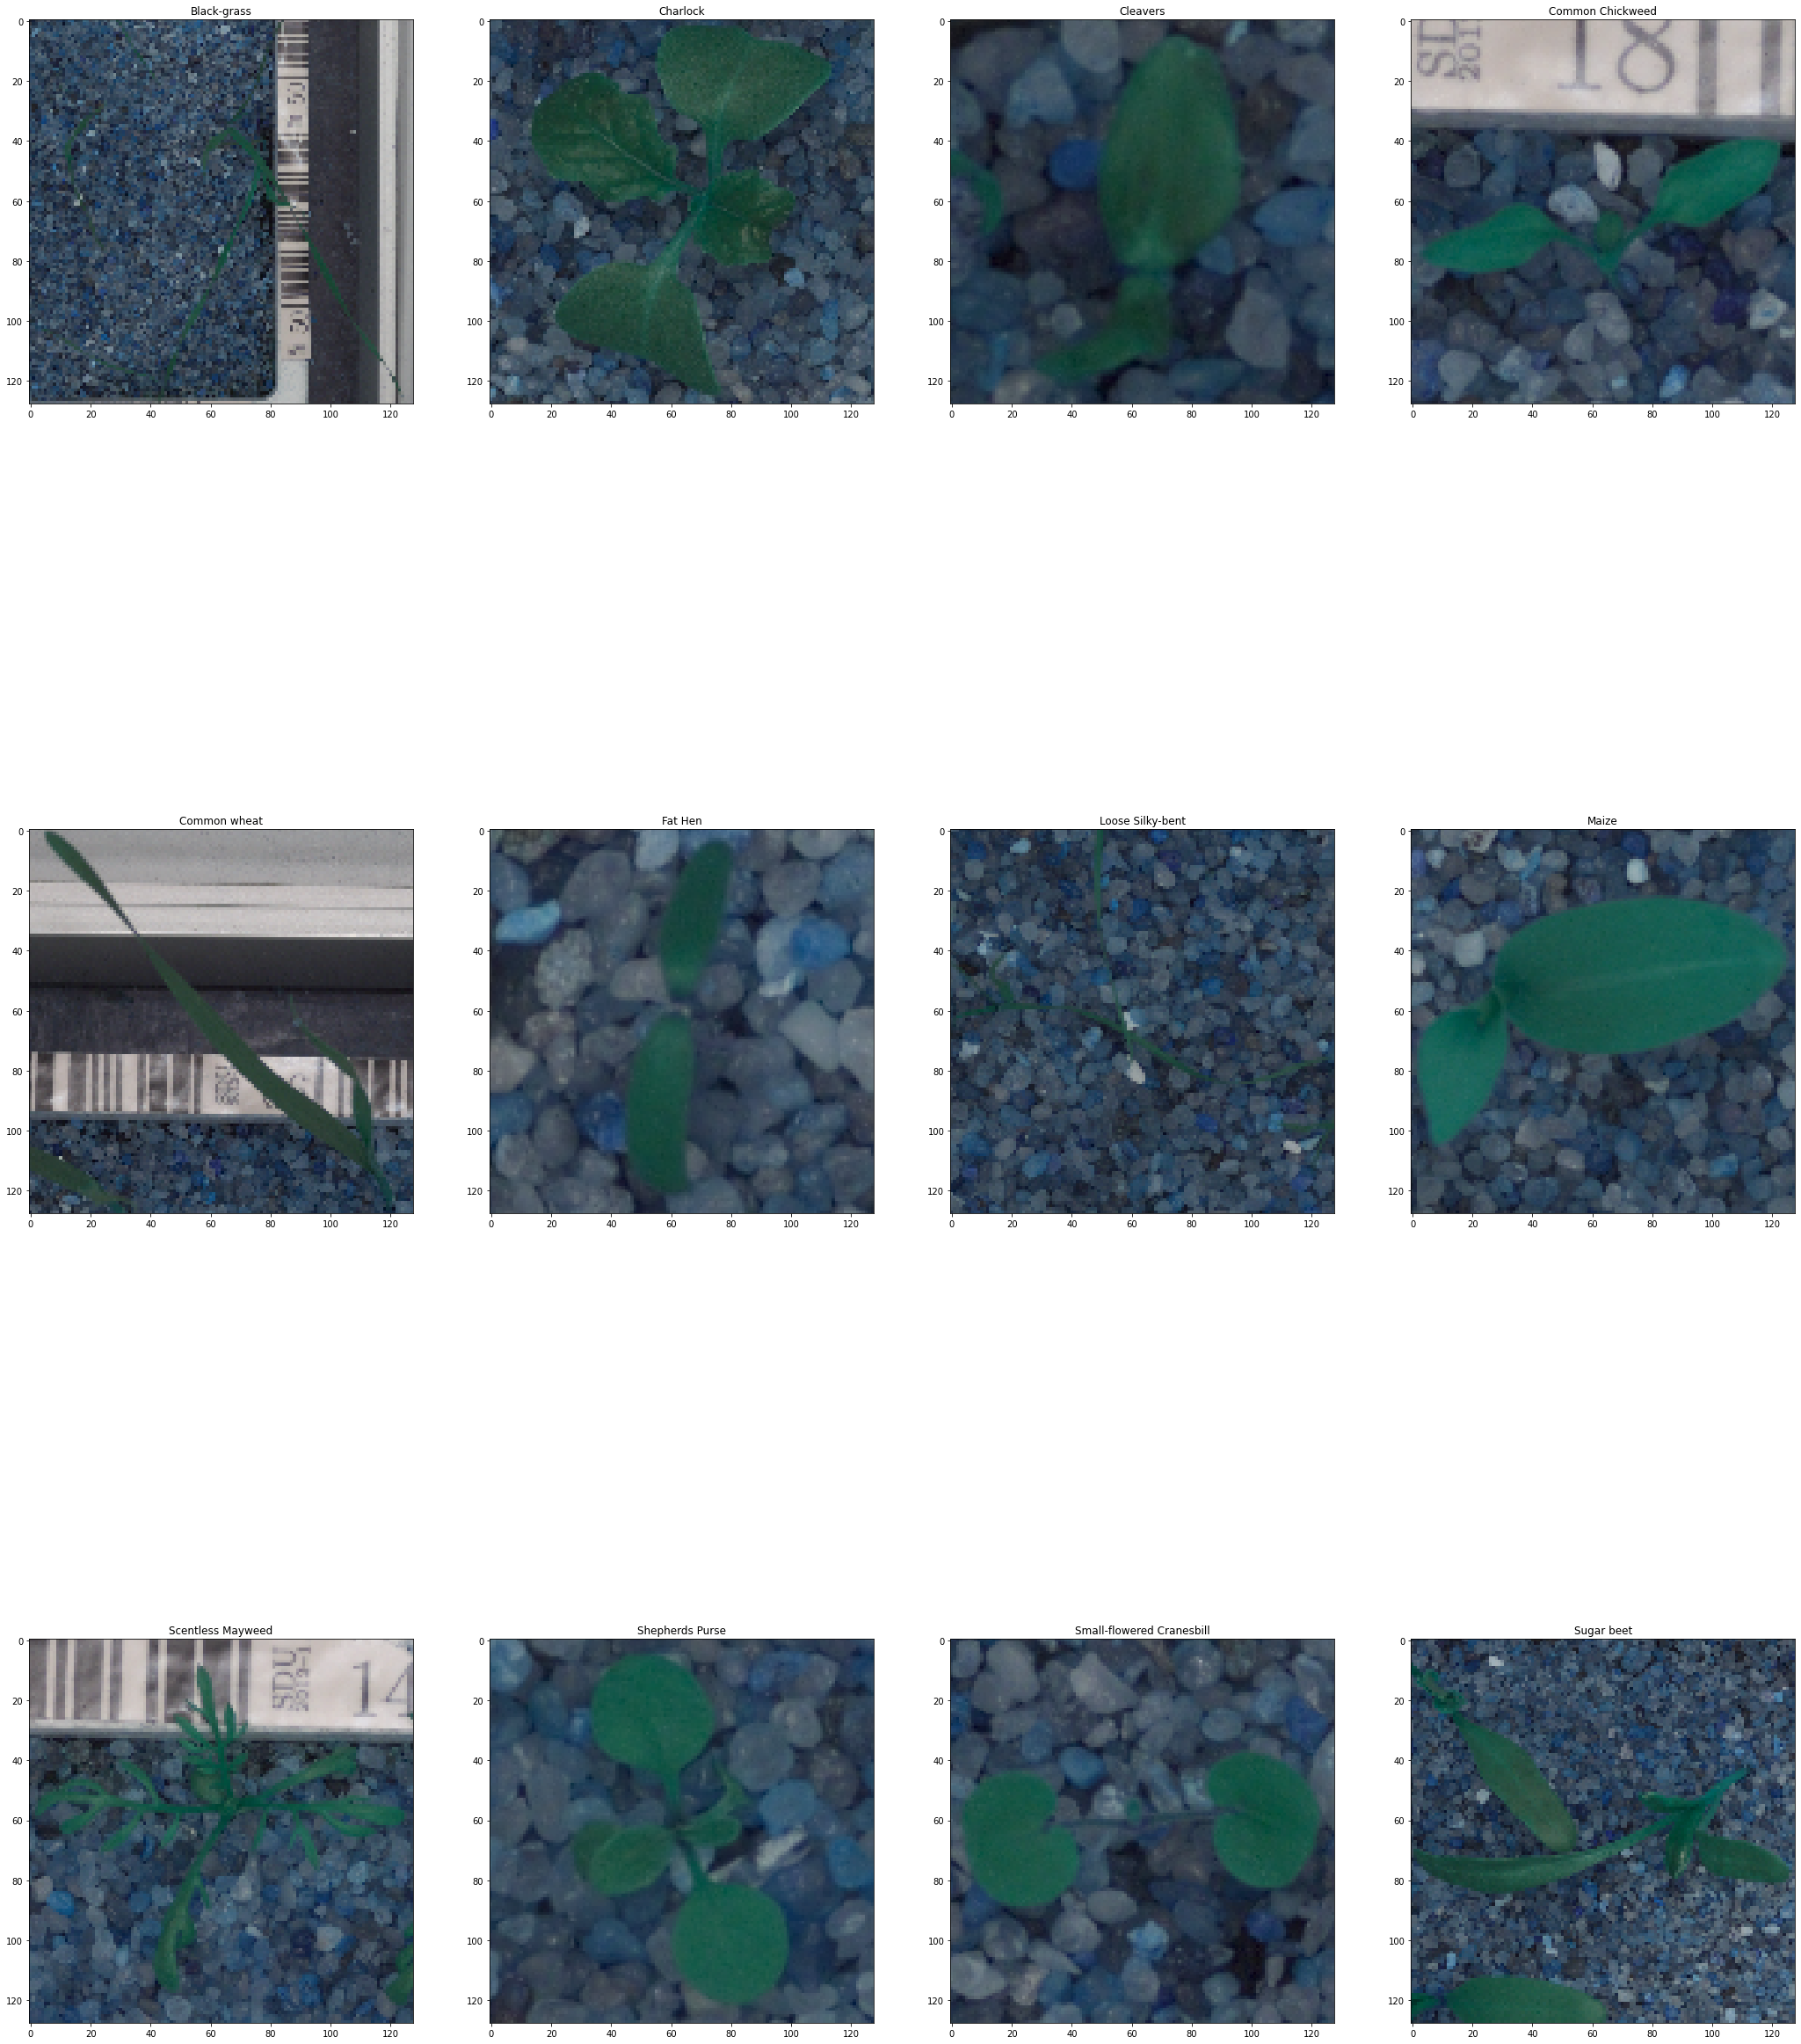

In [ ]:
fig2=plt.figure(figsize=(36,48))
for i in range(len(classnames)):
  fig2.add_subplot(3,4,i+1)
  plt.title(samplerdf['Label'][i])
  img=samplerdf['Array(s)'][i].reshape(128,128,3)
  plt.imshow(img, cmap='gray')
plt.show();

Sometimes a ruler is introduced into the picture. This might be a problem. Let's move on to Gaussian Blurring.

In [ ]:
from scipy.signal import convolve2d  

kernel = np.array([[0.003765,	0.015019,	0.023792,	0.015019,	0.003765],
[0.015019,	0.059912,	0.094907,	0.059912,	0.015019],
[0.023792,	0.094907,	0.150342,	0.094907,	0.023792],
[0.015019,	0.059912,	0.094907,	0.059912,	0.015019],
[0.003765,	0.015019,	0.023792,	0.015019,	0.003765]])

print(df.shape[0])

blurredimages=[]
for i in range(df.shape[0]):
  img=df['Array(s)'][i].reshape(128,128,3)
  channels=[]
  for i in range(3):
    blur=convolve2d(kernel, img[:,:,i], mode='valid')
    blur/=255.
    channels.append(blur)
  blurredimages.append(np.array(channels).flatten(order='F'))
series=pd.Series(blurredimages, name='Blurred Array(s)')

df[series.name] = series
print(df['Array(s)'][0].shape)
print(df['Blurred Array(s)'][0].shape)
df

4750
(49152,)
(46128,)


,Label,Array(s),Blurred Array(s)
0,Small-flowered Cranesbill,"[35, 52, 78, 36, 49, 76, 31, 45, 69, 43, 58, 7...","[0.22348705098039215, 0.28687595294117635, 0.3..."
1,Small-flowered Cranesbill,"[30, 47, 63, 30, 50, 60, 34, 47, 63, 23, 31, 4...","[0.12216393333333332, 0.1886445294117647, 0.25..."
2,Small-flowered Cranesbill,"[154, 149, 144, 162, 156, 152, 161, 154, 151, ...","[0.5562954705882354, 0.544457050980392, 0.5448..."
3,Small-flowered Cranesbill,"[49, 48, 57, 47, 48, 58, 48, 50, 56, 55, 56, 6...","[0.2553541568627451, 0.26062396470588234, 0.28..."
4,Small-flowered Cranesbill,"[53, 67, 80, 48, 62, 75, 43, 55, 68, 39, 49, 6...","[0.18227440392156857, 0.2377532705882353, 0.28..."
...,...,...,...
4745,Loose Silky-bent,"[79, 94, 104, 77, 94, 105, 74, 94, 104, 51, 72...","[0.12151389411764704, 0.33372803529411765, 0.2..."
4746,Loose Silky-bent,"[55, 69, 85, 54, 67, 82, 50, 62, 78, 45, 56, 7...","[0.21514590588235297, 0.25825049803921574, 0.3..."
4747,Loose Silky-bent,"[163, 165, 170, 55, 56, 67, 58, 56, 60, 59, 56...","[0.23162404313725493, 0.21790080784313728, 0.2..."
4748,Loose Silky-bent,"[116, 142, 153, 107, 137, 152, 110, 141, 154, ...","[0.33122217254901964, 0.43372727058823535, 0.4..."


                        Label  ...                                   Blurred Array(s)
0                 Black-grass  ...  [0.22255685882352946, 0.310933905882353, 0.391...
1                    Charlock  ...  [0.24833654509803926, 0.3269934980392156, 0.39...
2                    Cleavers  ...  [0.10356863137254903, 0.10965220392156863, 0.1...
3            Common Chickweed  ...  [0.6687519568627449, 0.6420080235294118, 0.647...
4                Common wheat  ...  [0.5752354039215687, 0.5732155058823529, 0.580...
5                     Fat Hen  ...  [0.30873178039215676, 0.37676705882352945, 0.3...
6            Loose Silky-bent  ...  [0.13432719215686276, 0.21508531764705882, 0.3...
7                       Maize  ...  [0.198900231372549, 0.2552210901960784, 0.3148...
8           Scentless Mayweed  ...  [0.39361398039215695, 0.3787989803921569, 0.39...
9             Shepherds Purse  ...  [0.254442631372549, 0.38778654117647055, 0.490...
10  Small-flowered Cranesbill  ...  [0.223487050980392

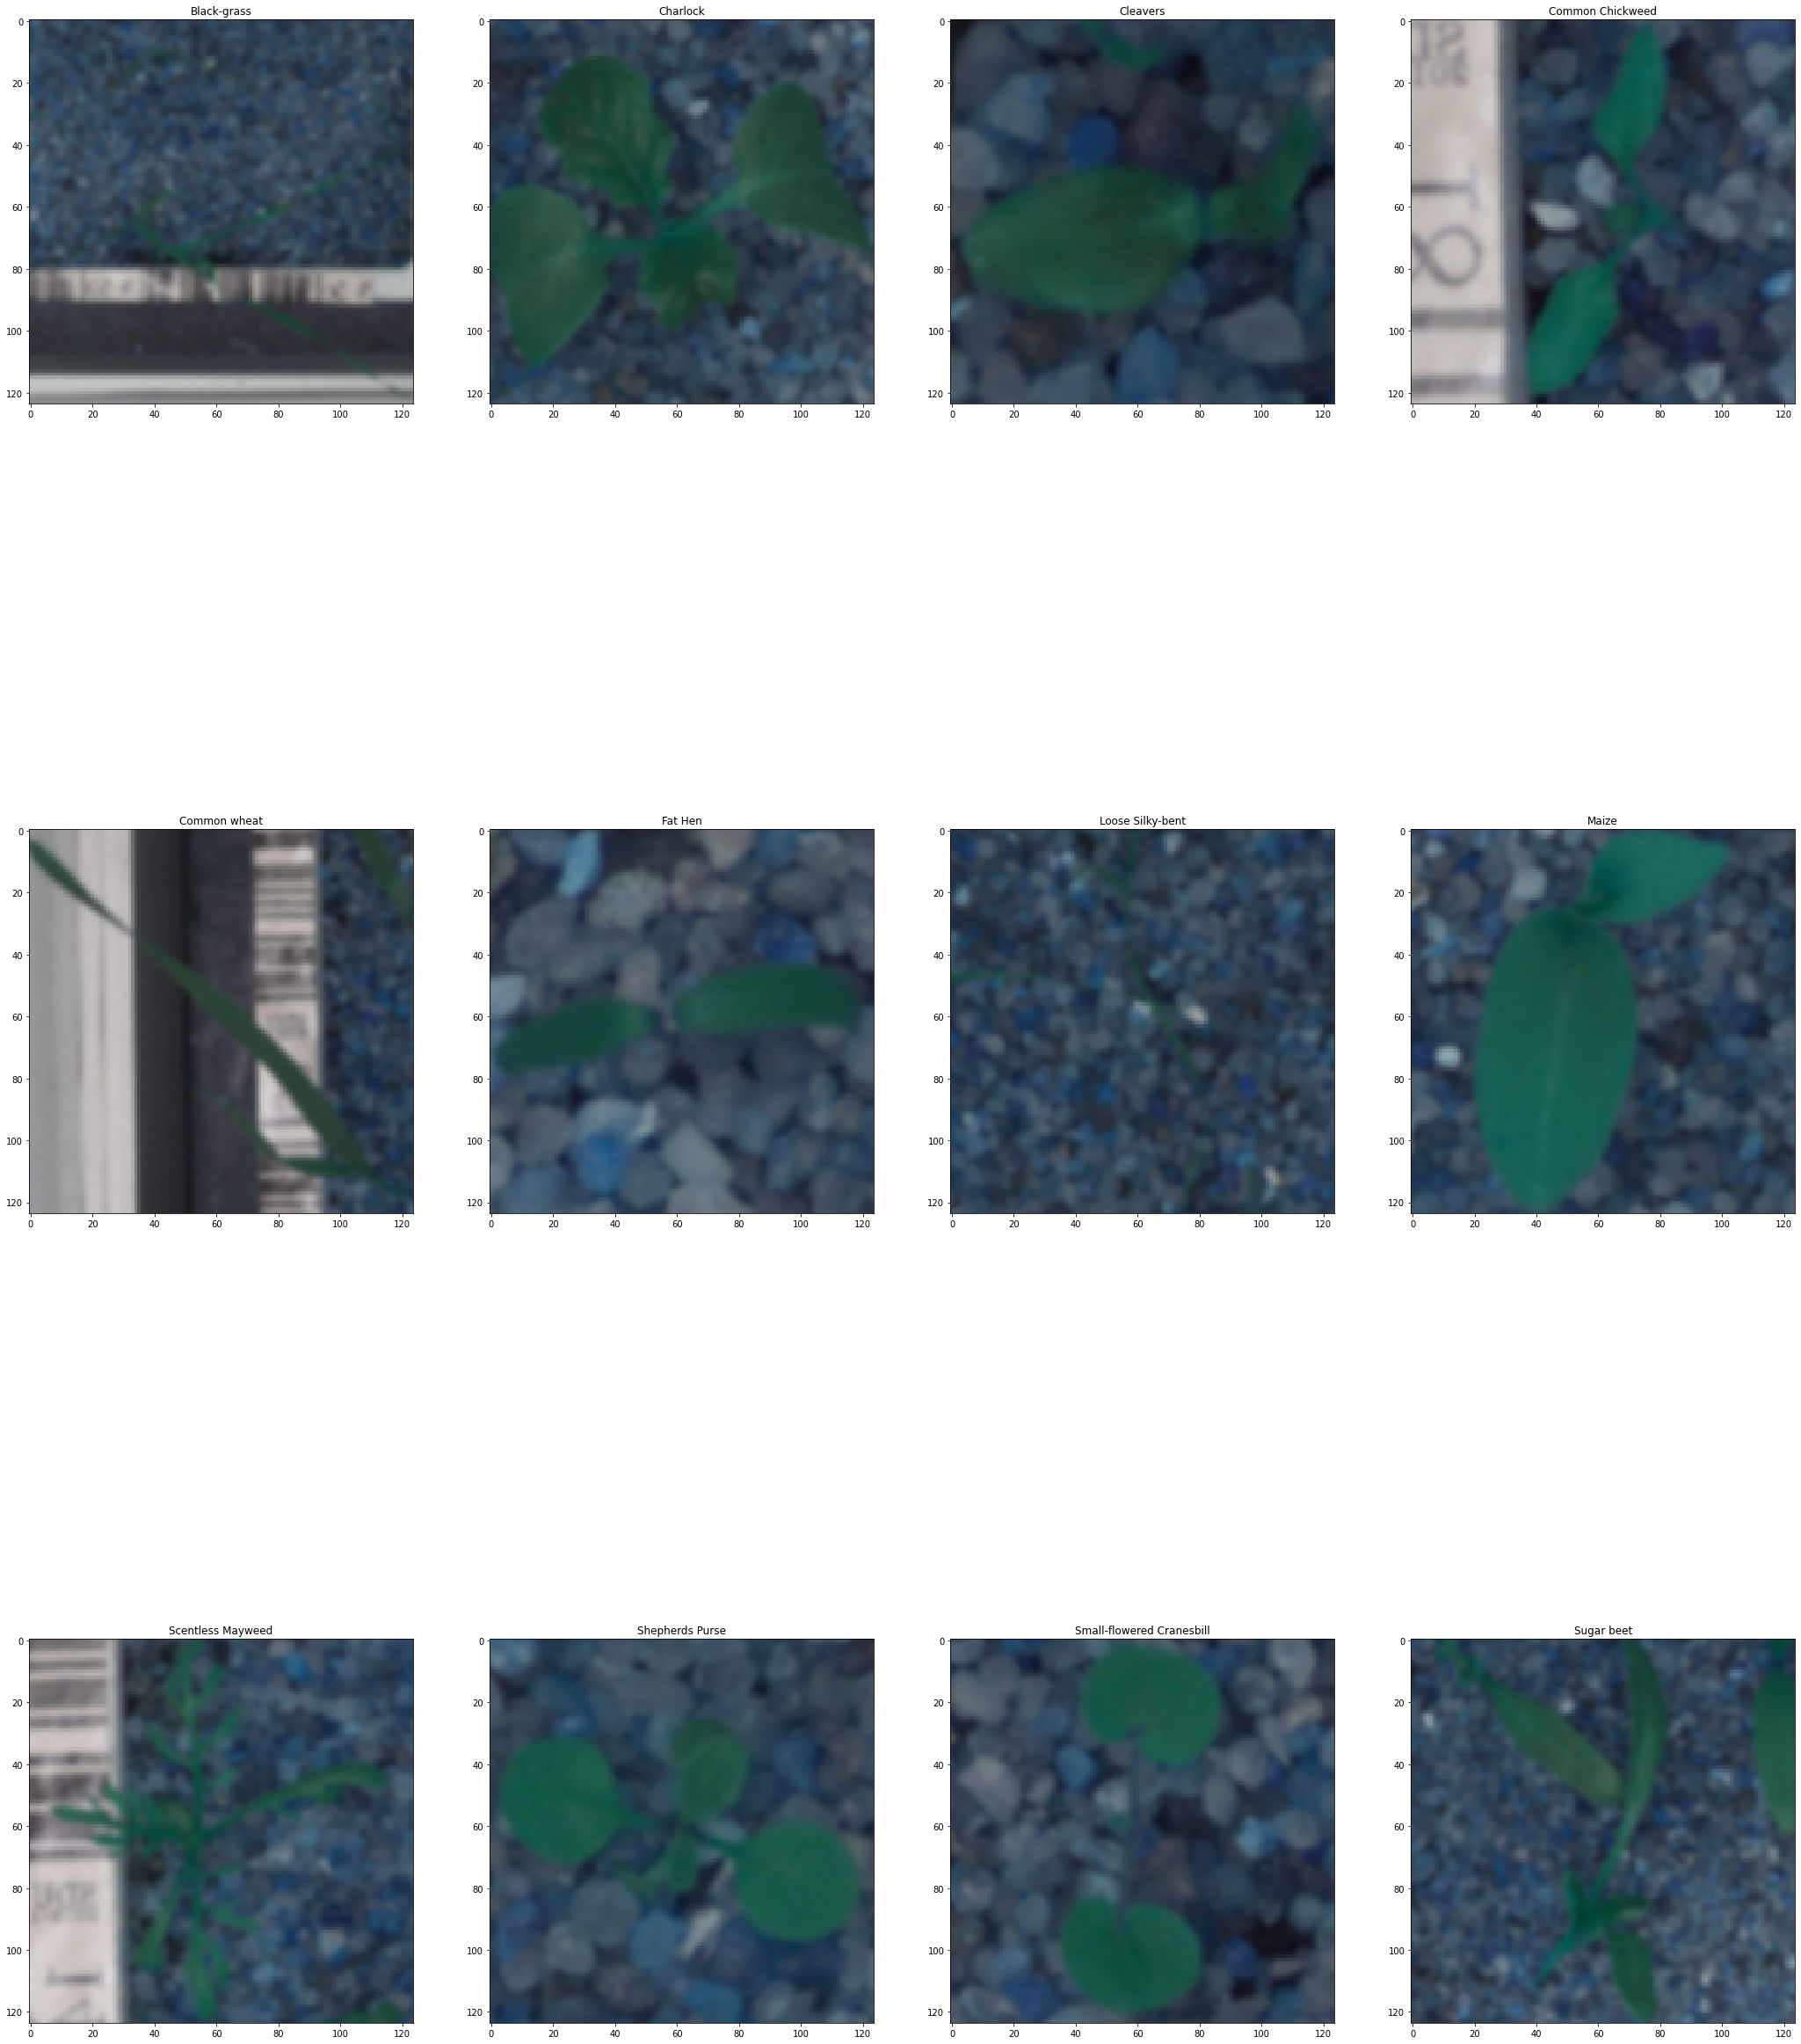

In [ ]:
blursamplerdf=df.groupby('Label', as_index=False).first()
print(blursamplerdf)
fig3=plt.figure(figsize=(36,48))
for i in range(len(classnames)):
  fig3.add_subplot(3,4,i+1)
  plt.title(blursamplerdf['Label'][i])
  #images are new size after convolution
  blur=blursamplerdf['Blurred Array(s)'][i].reshape(124,124,3)
  plt.imshow(blur, cmap='gray')
plt.show();

Well, they're blurry. And rotated now too? That shouldn't matter...

(4750, 46128)


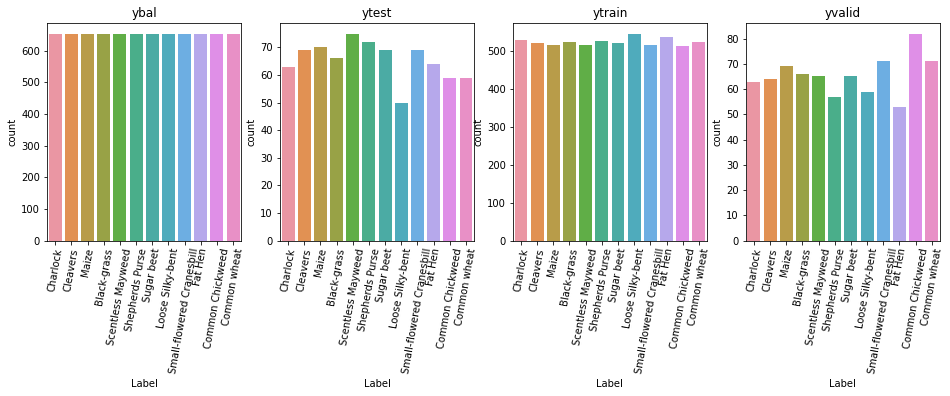

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
X=np.stack(df['Blurred Array(s)'].values).astype('float32')
print(X.shape)
Xbal, ybal=RandomOverSampler(sampling_strategy='not majority', random_state=42).fit_resample(X,y)

Xtrain, X_temp, ytrain, y_temp = train_test_split(Xbal, ybal, test_size=0.2, random_state=42, )
Xvalid, Xtest, yvalid, ytest = train_test_split(X_temp, y_temp, test_size=0.5, random_state=24)

toplot2=['ybal','ytest','ytrain','yvalid']
toplot={0:ybal,1:ytest,2:ytrain,3:yvalid}

plot2=plt.figure(figsize=(16,4))
for i in range(len(toplot)):
  plot2.add_subplot(1,4,i+1)
  sns.countplot(x=toplot[i], order=classnames)
  plt.xticks(rotation=80)
  plt.title(toplot2[i])
plt.show();



That'll show ya to give us an imbalanced set. On to one-hot encoding.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_map={x:i for i, x in enumerate(sorted(classnames))}

y_train=to_categorical([y_map[word] for word in ytrain], num_classes=12)
y_test=to_categorical([y_map[word] for word in ytest], num_classes=12)
y_valid=to_categorical([y_map[word] for word in yvalid], num_classes=12)

[0.31828738 0.35652651 0.4002215  ... 0.26297401 0.30467425 0.34666193]


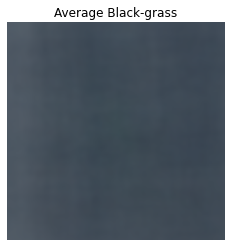

[0.27976671 0.33005956 0.37520265 ... 0.25314939 0.30479529 0.35191937]


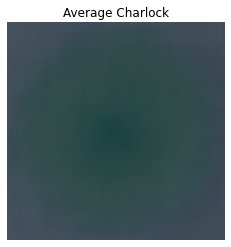

[0.24534477 0.30340093 0.36431348 ... 0.23982471 0.29791336 0.36147343]


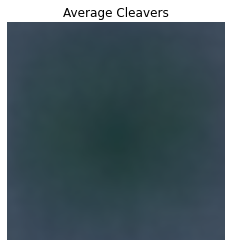

[0.2331156  0.30014753 0.35602246 ... 0.22435812 0.29040779 0.34517812]


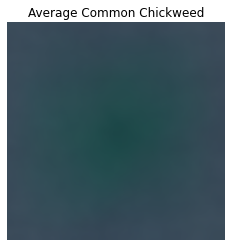

[0.24995935 0.30075949 0.35553583 ... 0.22538273 0.27570001 0.33297944]


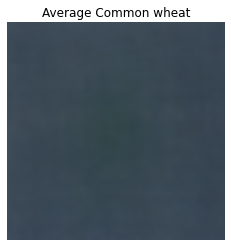

[0.25458582 0.30835447 0.36491681 ... 0.2298484  0.2823744  0.33761905]


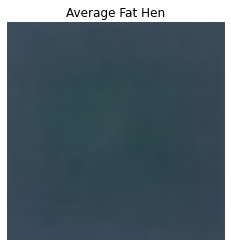

[0.2530605  0.3080286  0.36282507 ... 0.24733354 0.298379   0.35095343]


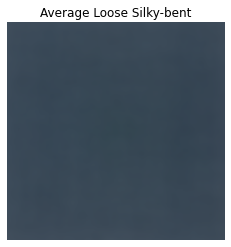

[0.27016544 0.33038311 0.37889476 ... 0.24313237 0.30117419 0.35743422]


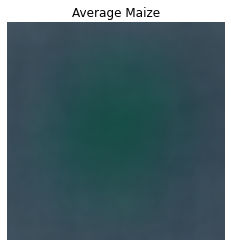

[0.22739486 0.2897373  0.35163545 ... 0.23749414 0.29721203 0.35573373]


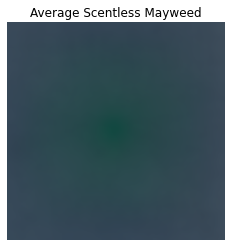

[0.2328716  0.29497779 0.35751159 ... 0.22525952 0.28615709 0.34578185]


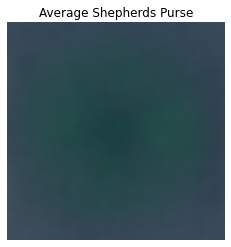

[0.2328176  0.28739545 0.34046846 ... 0.2449602  0.29716966 0.34820651]


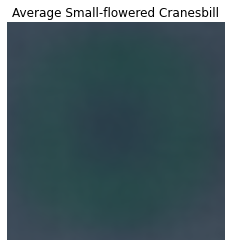

[0.26280448 0.31929217 0.37031481 ... 0.24460745 0.30601463 0.36124119]


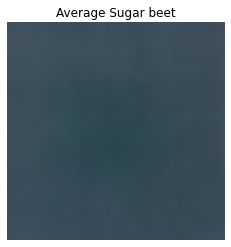

(785, 12)
(785, 46128)
(12,)
(46128,)
float32


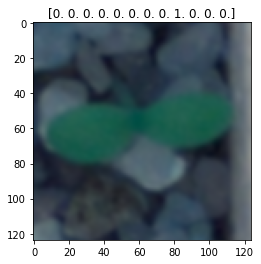

In [ ]:
def find_mean_img(mean_mat, title):
    # reshape it back to a matrix
    mean_img = mean_mat.reshape((124,124,3))
    plt.imshow(mean_img, vmin=0., vmax=1.0, cmap='gray')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show();
    return mean_img
print(df.groupby('Label', as_index=False))

mean_data={}
for cat in sorted(classnames):
  tmp=df.loc[df['Label']==cat]
  mean_data[cat]=np.mean(tmp['Blurred Array(s)'])
  print(mean_data[cat])
  find_mean_img(mean_data[cat],cat)

print(y_test.shape)
print(Xtest.shape)

print(y_test[0].shape)
print(Xtest[0].shape) # 46128=124*124*3
print(Xtest.dtype)
plt.title(y_test[0])
plt.imshow(X=Xtest[0].reshape(124,124,3), cmap='gray')
plt.show();

In [ ]:
from tensorflow.keras.models import Sequential                            # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D                                # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D        # Max and Average pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten                               # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 

input_shape=(124,124,3)
num_classes=12

model=Sequential()
model.add(Conv2D(96,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='leaky_relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
from tensorflow.keras import backend as K
from tensorflow import keras
from keras import callbacks 
# Garbage Collector - use it like gc.collect()
import gc

# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(keras.callbacks.Callback):
    def on_batch_end(self, epoch, logs=None):
        gc.collect()

class SessionClearCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        K.clear_session()
    def on_train_end(self, logs=None):
        K.clear_session()
        del(self)

In [ ]:
loss='categorical_crossentropy'
opt=keras.optimizers.SGD(learning_rate=.01)
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

In [ ]:
X_train=Xtrain.reshape(Xtrain.shape[0],124,124,3)
X_valid=Xvalid.reshape(Xvalid.shape[0],124,124,3)
X_test=Xtest.reshape(Xtest.shape[0],124,124,3)

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger
import os

loaded1=False
mc1=ModelCheckpoint('take1.h5',monitor='val_accuracy',mode='max',verbose=0,save_best_only=True)
take1_logger = CSVLogger('take1.csv', separator=',', append=False)

if os.path.isfile("./take1.h5"):
  take1=model.load_weights("./take1.h5")
  hist=pd.read_csv("./take1.csv")
  loaded1=True
else: take1=model.fit(X_train, y_train, batch_size=32, epochs=6,verbose=1, validation_data=(X_valid, y_valid),callbacks=[GarbageCollectorCallback(),SessionClearCallback(),mc1,take1_logger])

Epoch 1/6
197/197 [==============================] - 52s 222ms/step - loss: 1.3216 - accuracy: 0.5615 - val_loss: 2.3692 - val_accuracy: 0.1006
Epoch 2/6
197/197 [==============================] - 43s 219ms/step - loss: 0.4448 - accuracy: 0.8624 - val_loss: 1.1603 - val_accuracy: 0.7108
Epoch 3/6
197/197 [==============================] - 44s 225ms/step - loss: 0.1314 - accuracy: 0.9680 - val_loss: 0.7284 - val_accuracy: 0.7669
Epoch 4/6
197/197 [==============================] - 45s 228ms/step - loss: 0.0420 - accuracy: 0.9954 - val_loss: 0.5152 - val_accuracy: 0.8675
Epoch 5/6
197/197 [==============================] - 38s 193ms/step - loss: 0.0199 - accuracy: 0.9986 - val_loss: 0.5132 - val_accuracy: 0.8586
Epoch 6/6
197/197 [==============================] - 44s 224ms/step - loss: 0.0105 - accuracy: 0.9998 - val_loss: 0.4423 - val_accuracy: 0.8790


       loss  accuracy  val_loss  val_accuracy  epoch
0  1.321592  0.561485  2.369235      0.100637      0
1  0.444750  0.862377  1.160306      0.710828      1
2  0.131381  0.967983  0.728371      0.766879      2
3  0.042017  0.995381  0.515224      0.867516      3
4  0.019887  0.998566  0.513173      0.858599      4


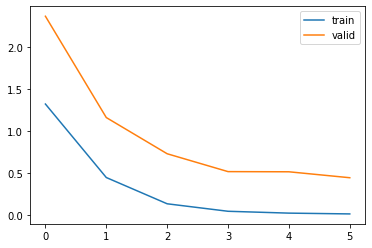

In [ ]:
if not loaded1: # Capturing learning history per epoch
  hist  = pd.DataFrame(take1.history)
  hist['epoch'] = take1.epoch

print(hist.head())
# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.show();

In [ ]:
score=model.evaluate(X_test,y_test, verbose=0)
print('loss:',score[0])
print('acc:',score[1])

loss: 0.43353092670440674
acc: 0.8891719579696655


Honestly, not bad. We can tell the model is overfitting because the validation accuracy is only around 89% while the train accuracy is 100%. It performs okay, at about 89% on test data.

The validation loss seems to vary epoch to epoch

What can we do to better our model?
* Add more convolutional layers
* change our kernel numbers, sizes and strides
* try average pooling instead of max
* vary loss function
* vary optimizer
* add dropout
* early stopping?
* vary metrics

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

[9.5643569e-11 3.3127176e-08 3.8085446e-09 6.9625145e-03 1.5009167e-08
 3.2147518e-06 6.2821140e-13 1.2831138e-05 9.9301118e-01 8.3544155e-06
 5.1112245e-08 1.7643262e-06]
[False False False False False False False False  True False False False]
Scentless Mayweed
[[62  0  0  0  0  0  4  0  0  0  0  0]
 [ 3 57  0  0  0  0  0  1  1  0  1  0]
 [ 1  0 66  0  0  0  1  0  1  0  0  0]
 [ 2  1  0 52  0  1  1  1  1  0  0  0]
 [ 2  0  0  0 57  0  0  0  0  0  0  0]
 [ 5  1  0  0  0 49  6  0  2  0  0  1]
 [ 5  0  0  1  2  2 38  1  1  0  0  0]
 [ 0  0  0  1  0  0  0 68  0  1  0  0]
 [ 9  0  1  2  0  0  3  0 57  1  0  2]
 [ 2  0  0  2  0  2  0  0  1 65  0  0]
 [ 2  3  0  0  0  2  0  0  1  0 61  0]
 [ 4  1  0  1  1  1  2  0  1  1  1 56]]


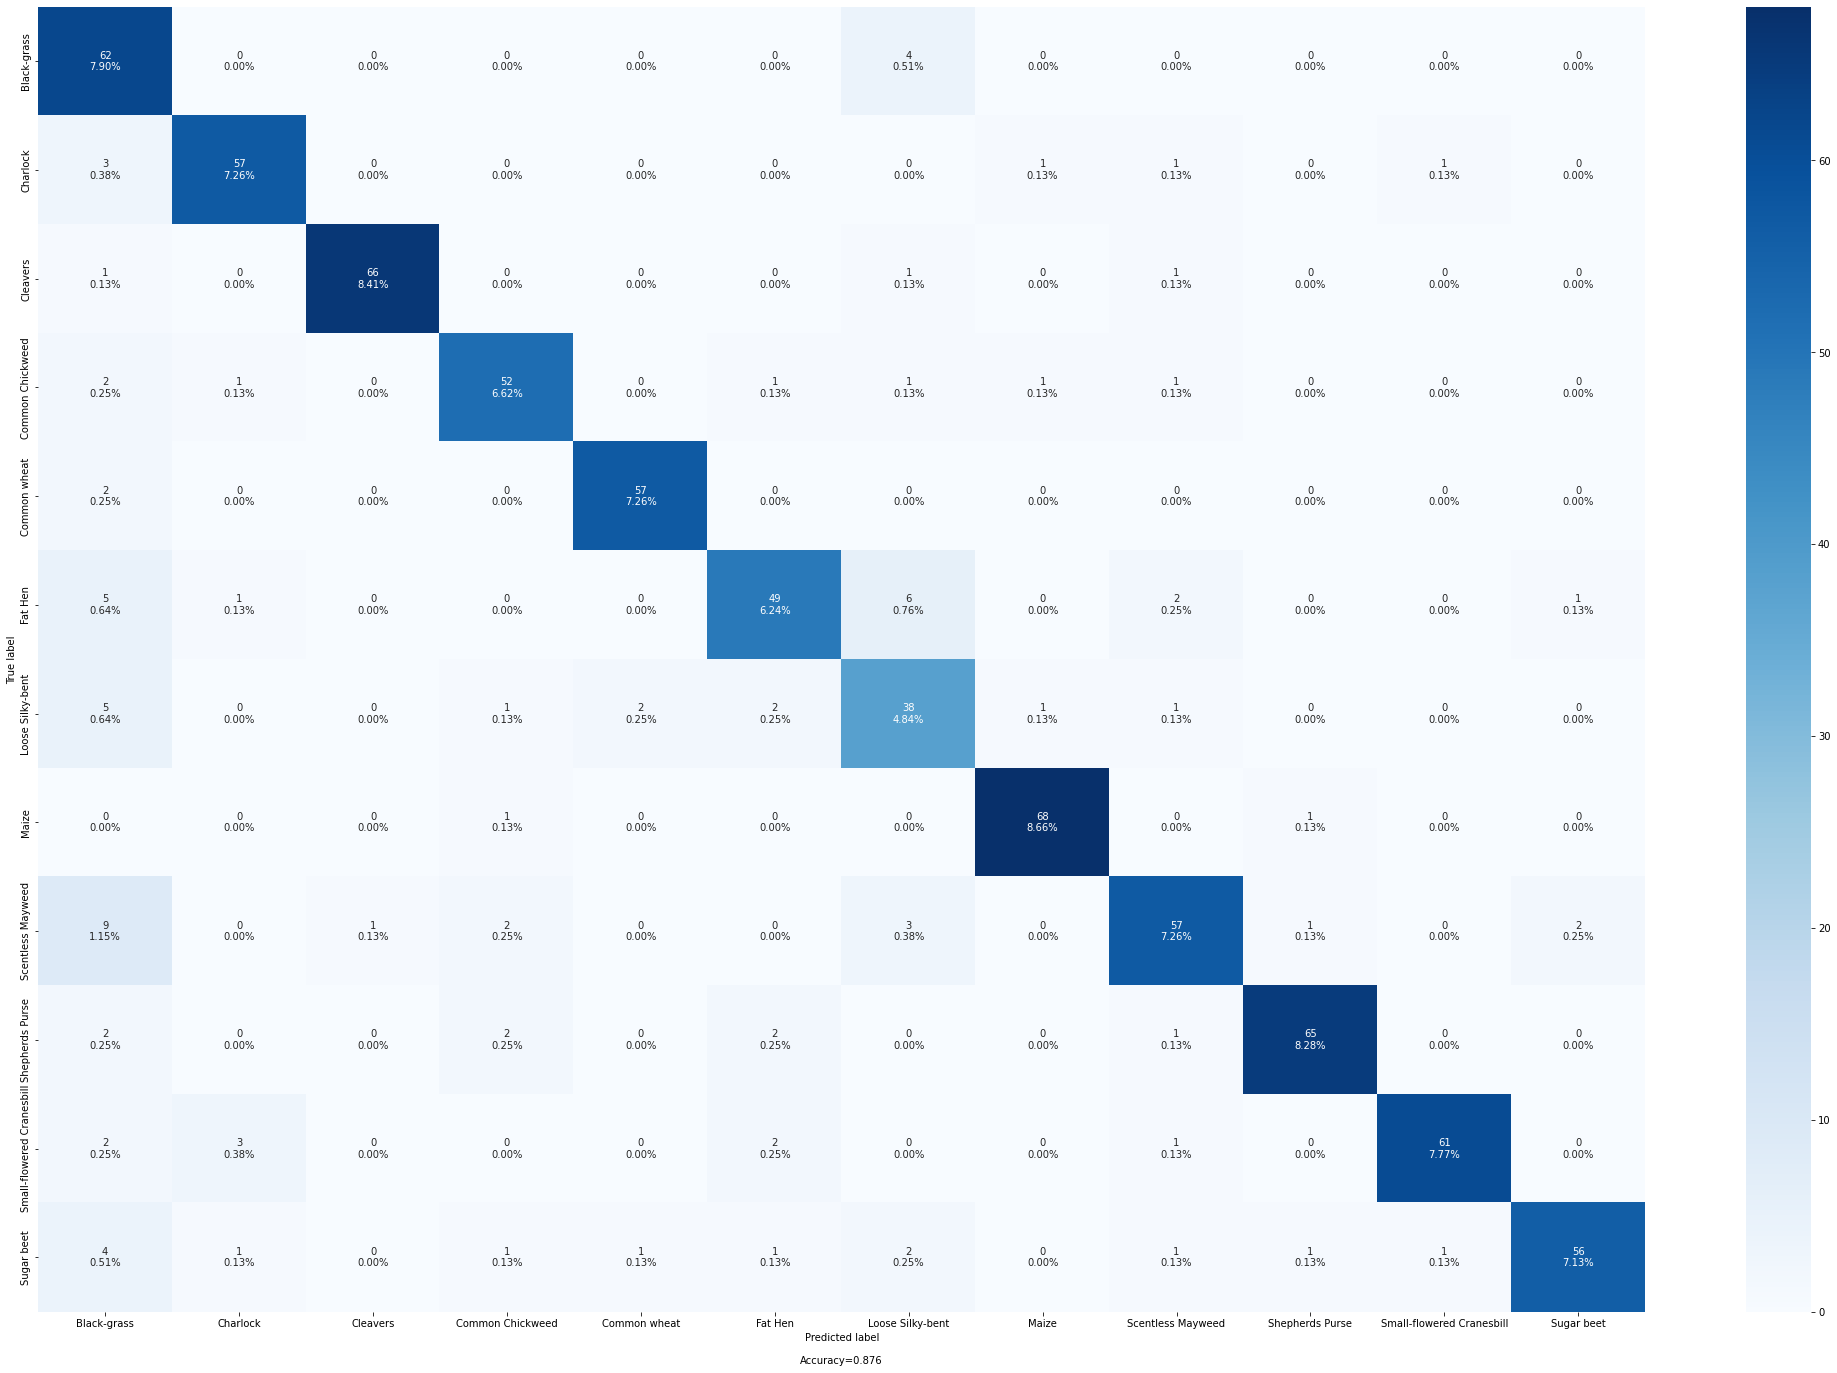

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#Calculating the confusion matrix 
y_pred1=model.predict(X_test)

print(y_pred1[0])
#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
print(y_pred1[0])

ypred1=[]
for i in y_pred1:
    ypred1.append(sorted(classnames)[np.argmax(i)])
print(ypred1[0])

cm = metrics.confusion_matrix(ytest,ypred1)
print(cm)

cm1=confusion_matrix(ytest, ypred1)
categories = sorted(classnames)
make_confusion_matrix(cm1,
                      categories=categories, 
                      cmap='Blues',
                      figsize=(36,24))

There seems to be a lot plants mistakenly predicted as Black-grass, particularly Common Wheat, Fat Hen, and Loose Silky-Bent. 

In [ ]:
input_shape=(124,124,3)
num_classes=12
initiated=False
def create_model(z_dropout_rate=0.1,layer_1=64,kn1=3,kn2=3,lr=0.005,normalize=True, normalize2=True, add_layer=True,cnn_act='relu', ann_act='relu'): # nn=1024 is best
    print(locals())
    localdf=pd.DataFrame.from_dict({k:[v] for (k,v) in locals().items()})
    global initiated
    if initiated==False:
      global param_log
      param_log=pd.DataFrame()
      initiated=True
    param_log=param_log.append(localdf)
    model=Sequential()
    model.add(Conv2D(layer_1,kernel_size=(kn1,kn1),strides=((kn1-1)//2,(kn1-1)//2),activation=cnn_act,input_shape=input_shape))
    if normalize:
      model.add(BatchNormalization())
      model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
    else: model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    if add_layer:
        model.add(Conv2D(layer_1*2,kernel_size=(kn2,kn2),strides=((kn2-1)//2,(kn2-1)//2),activation=cnn_act, name='Conv2D2'))
        if normalize2:
          model.add(BatchNormalization(name='BN2'))
          model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2), name='Pooling2'))
        else: model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='Pooling2'))
    model.add(Flatten())

    model.add(Dense(1024, activation=ann_act))
    model.add(Dropout(z_dropout_rate))
    model.add(Dense(num_classes, activation='softmax', name='Output'))

    opt=keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
cvmodel=create_model()
print(param_log.head())
param_dict=param_log.to_dict(orient='list')
del(param_log)
initiated=False
print(param_dict)
cvmodel=create_model(**{i:x[0] for (i,x) in param_dict.items()})
print(param_log.head())
del(param_log)
initiated=False

{'z_dropout_rate': 0.1, 'layer_1': 64, 'kn1': 3, 'kn2': 3, 'lr': 0.005, 'normalize': True, 'normalize2': True, 'add_layer': True, 'cnn_act': 'relu', 'ann_act': 'relu'}
   z_dropout_rate  layer_1  kn1  kn2  ...  normalize2  add_layer  cnn_act  ann_act
0             0.1       64    3    3  ...        True       True     relu     relu

[1 rows x 10 columns]
{'z_dropout_rate': [0.1], 'layer_1': [64], 'kn1': [3], 'kn2': [3], 'lr': [0.005], 'normalize': [True], 'normalize2': [True], 'add_layer': [True], 'cnn_act': ['relu'], 'ann_act': ['relu']}
{'z_dropout_rate': 0.1, 'layer_1': 64, 'kn1': 3, 'kn2': 3, 'lr': 0.005, 'normalize': True, 'normalize2': True, 'add_layer': True, 'cnn_act': 'relu', 'ann_act': 'relu'}
   z_dropout_rate  layer_1  kn1  kn2  ...  normalize2  add_layer  cnn_act  ann_act
0             0.1       64    3    3  ...        True       True     relu     relu

[1 rows x 10 columns]


In [ ]:
param_grid = {
    "z_dropout_rate":[0.5,0.25,0.01],
    "layer_1":[32,64],
    "kn1":[3,5,7],
    "kn2":[3,5,7],
    "cnn_act":['relu','leaky_relu'],
    "ann_act":['relu','leaky_relu'],
    "normalize":[True, False],
    "normalize2":[True, False],
    "add_layer":[True, False],
    "lr":[0.01,0.005,0.001] #adam is best, tried them all
}

class GridCrashesCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      print(param_log.iloc[epoch])

RSlog=CSVLogger('RScv.csv', separator=',',append=True)
#RSck=ModelCheckpoint('RScv.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [ ]:
#!pip install scikeras
from keras.wrappers.scikit_learn import KerasClassifier

keras_estimator = KerasClassifier(build_fn=create_model, verbose=1, batch_size=32, callbacks=[GarbageCollectorCallback(),SessionClearCallback(),GridCrashesCallback(), RSlog])

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
# define the grid search parameters

seed=random.randint(0,99)
print(seed)
kfold_splits = 3
grid = RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=2,
                    cv=kfold_splits,  
                    param_distributions=param_grid,
                    scoring='accuracy',
                    error_score='raise',
                    n_iter=15,
                    random_state=seed
)

7


In [ ]:
import joblib # uncomment the try portion if you dare!
import tensorflow as tf

grid_result=None

try:
  print('GridSearching...')
  #  with joblib.parallel_backend('threading'):
  #    grid_result = grid.fit(X_train, ytrain, validation_split=0.2)
except tf.errors.ResourceExhaustedError:
  # I spent a lot time on this except case... CV crashes way too much...
  print('\nNOIDED\n')
  if os.path.isfile("./RScv.csv"):
    tmp=pd.read_csv('RScv.csv')
    tmp=tmp[pd.to_numeric(tmp.accuracy, errors='coerce').notnull()].reset_index(drop=True)
    print(tmp.shape)
    print(param_log.shape)
    max_i=tmp.index[tmp.accuracy == tmp.accuracy.max()]
    bacc=param_log.iloc[max_i].to_dict(orient='list')
    max_iv=tmp.index[tmp.val_accuracy == tmp.val_accuracy.max()]
    baccv=param_log.iloc[max_iv].to_dict(orient='list')
    print(f'Best Accuracy: {tmp.accuracy.max()}, using parameters {bacc}')
    print(f'Best Val Acc.: {tmp.val_accuracy.max()}, using parameters {baccv}')
  else: print('Hm, no RScv!')

# Summarize results
if not grid_result==None:
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']

GridSearching...


Best: 0.487263 using {'z_dropout_rate': 0.01, 'sn': 1, 'nn': 1024, 'layer_2': 128, 'layer_1': 64, 'kn': 3, 'a_opt': 'adam'}

Best: 0.390723 using {'z_dropout_rate': 0.5, 'sn': 1, 'nn': 1024, 'layer_2': 64, 'layer_1': 32, 'kn': 3, 'a_opt': 'RMSprop'}

I changed up the architecture of the gridsearch. The output is now:

Best: 0.451587 using {'z_dropout_rate': 0.01, 'layer_1': 64, 'kn2': 3, 'kn1': 3, 'a_opt': 'adam'}, meaning the second layer will have 128 kernels, and the strides will be 1, nn will have 1024  y default (seems to be best)

Another change:
Best: 0.560520 using {'z_dropout_rate': 0.25, 'normalize': False, 'layer_1': 32, 'kn2': 7, 'kn1': 3, 'cnn_act': 'leaky_relu', 'ann_act': 'relu', 'a_opt': 'adam'} Hey cool, a size 7 kernel. Let's see how this one plays out.

It was okay. Further changing the architecture... 
Best: 0.341983 using {'z_dropout_rate': 0.25, 'normalize2': False, 'normalize': False, 'lr': 0.001, 'layer_1': 32, 'kn2': 3, 'kn1': 7, 'cnn_act': 'relu', 'ann_act': 'relu', 'add_layer': True}

Okay! I maybe made a way to salvage information from a CV crash.

Best Accuracy: 0.4856630861759186, using parameters {'z_dropout_rate': [0.25], 'layer_1': [32], 'kn1': [7], 'kn2': [5], 'lr': [0.001], 'normalize': [True], 'normalize2': [True], 'add_layer': [False], 'cnn_act': ['relu'], 'ann_act': ['relu']}

Best Accuracy: 0.5008960366249084, using parameters {'z_dropout_rate': [0.5], 'layer_1': [32], 'kn1': [5], 'kn2': [7], 'lr': [0.001], 'normalize': [True], 'normalize2': [True], 'add_layer': [False], 'cnn_act': ['relu'], 'ann_act': ['relu']} or 
Best Val Acc.: 0.4121863842010498, using parameters {'z_dropout_rate': [0.25], 'layer_1': [32], 'kn1': [7], 'kn2': [7], 'lr': [0.001], 'normalize': [False], 'normalize2': [True], 'add_layer': [True], 'cnn_act': ['relu'], 'ann_act': ['relu']}

Best Accuracy: 0.5008960366249084, using parameters {'z_dropout_rate': [0.5], 'layer_1': [32], 'kn1': [5], 'kn2': [7], 'lr': [0.001], 'normalize': [True], 'normalize2': [True], 'add_layer': [False], 'cnn_act': ['relu'], 'ann_act': ['relu']}

Best Accuracy: 0.36768218874931335, using parameters {'z_dropout_rate': [0.5], 'layer_1': [64], 'kn1': [3], 'kn2': [5], 'lr': [0.005], 'normalize': [False], 'normalize2': [True], 'add_layer': [False], 'cnn_act': ['relu'], 'ann_act': ['leaky_relu']}

In [ ]:
model2=create_model(z_dropout_rate=0.01,layer_1=96,kn1=3,kn2=5,lr=0.001,normalize=True, normalize2=True, add_layer=False,cnn_act='leaky_relu', ann_act='leaky_relu')

{'z_dropout_rate': 0.01, 'layer_1': 96, 'kn1': 3, 'kn2': 5, 'lr': 0.001, 'normalize': True, 'normalize2': True, 'add_layer': False, 'cnn_act': 'leaky_relu', 'ann_act': 'leaky_relu'}


In [ ]:
input_shape=(124,124,3)
num_classes=12

def better_model_maker(metric='accuracy'):
  model=Sequential()
  model.add(Conv2D(32,kernel_size=(3,3),activation='leaky_relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,kernel_size=(7,7),strides=(3,3),activation='leaky_relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = metric)
  return model

take2=model2.fit(X_train, y_train, batch_size=32, epochs=6,verbose=1, validation_data=(X_valid, y_valid),callbacks=[GarbageCollectorCallback(),SessionClearCallback()])

Epoch 1/6
197/197 [==============================] - 43s 216ms/step - loss: 11.8057 - accuracy: 0.4998 - val_loss: 3.0657 - val_accuracy: 0.1580
Epoch 2/6
197/197 [==============================] - 43s 216ms/step - loss: 0.6942 - accuracy: 0.8052 - val_loss: 2.4172 - val_accuracy: 0.1631
Epoch 3/6
197/197 [==============================] - 42s 216ms/step - loss: 0.3634 - accuracy: 0.8928 - val_loss: 1.6741 - val_accuracy: 0.5503
Epoch 4/6
197/197 [==============================] - 43s 217ms/step - loss: 0.2827 - accuracy: 0.9207 - val_loss: 3.5355 - val_accuracy: 0.5146
Epoch 5/6
197/197 [==============================] - 42s 214ms/step - loss: 0.2358 - accuracy: 0.9347 - val_loss: 5.2892 - val_accuracy: 0.4331
Epoch 6/6
197/197 [==============================] - 42s 213ms/step - loss: 0.6661 - accuracy: 0.8675 - val_loss: 13.0874 - val_accuracy: 0.3783


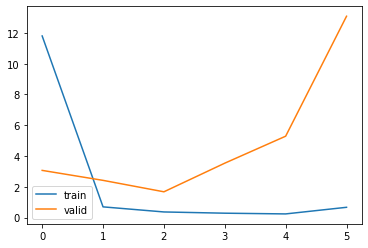

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(take2.history)
hist['epoch'] = take2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.show();

In [ ]:
score=model2.evaluate(X_test,y_test, verbose=0)
print('loss:',score[0])
print('acc:',score[1])

loss: 13.571120262145996
acc: 0.3643312156200409


The model is performing not as well as our initial, nearly 96% in the train data, 79% in the test data and 81% in the validation data. Sure, the validation loss strays, but that's nothing that earlystopping or some tweaking can't adjust. Best to stop around epoch 5 when val loss is lowest.

In [ ]:
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=-0.001, patience=1)

model2e=better_model_maker()

loaded2e=False
mc2e=ModelCheckpoint('take2e.h5',monitor='val_accuracy',mode='max',verbose=0,save_best_only=True)
take2e_logger = CSVLogger('take2e.csv', separator=',', append=False)

if os.path.isfile("./take2e.h5"):
  take2e=model.load_weights("./take2e.h5")
  hist=pd.read_csv("./take2e.csv")
  loaded2e=True
else: take2e = model2e.fit(X_train,y_train,batch_size=32,epochs=15,verbose=1,validation_split = 0.2,callbacks=[GarbageCollectorCallback(),es_cb,SessionClearCallback(),mc2e,take2e_logger])

Epoch 1/15
157/157 [==============================] - 26s 163ms/step - loss: 1.7049 - accuracy: 0.3753 - val_loss: 1.0440 - val_accuracy: 0.6099
Epoch 2/15
157/157 [==============================] - 26s 163ms/step - loss: 0.8865 - accuracy: 0.6888 - val_loss: 0.7677 - val_accuracy: 0.7325
Epoch 3/15
157/157 [==============================] - 26s 167ms/step - loss: 0.6106 - accuracy: 0.7913 - val_loss: 0.6035 - val_accuracy: 0.8002
Epoch 4/15
157/157 [==============================] - 26s 167ms/step - loss: 0.3791 - accuracy: 0.8644 - val_loss: 0.4177 - val_accuracy: 0.8591
Epoch 5/15
157/157 [==============================] - 26s 165ms/step - loss: 0.2123 - accuracy: 0.9259 - val_loss: 0.3605 - val_accuracy: 0.8766
Epoch 6/15
157/157 [==============================] - 27s 169ms/step - loss: 0.1866 - accuracy: 0.9305 - val_loss: 0.4476 - val_accuracy: 0.8607


In [ ]:
score=model2e.evaluate(X_test,y_test, verbose=0)
print('loss:',score[0])
print('acc:',score[1])

loss: 0.4694925546646118
acc: 0.8598726391792297


       loss  accuracy  val_loss  val_accuracy  epoch
0  1.704937  0.375348  1.043963      0.609873      0
1  0.886477  0.688769  0.767706      0.732484      1
2  0.610567  0.791318  0.603477      0.800159      2
3  0.379102  0.864397  0.417678      0.859076      3
4  0.212292  0.925926  0.360459      0.876592      4


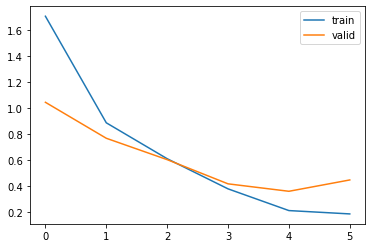

In [ ]:
if not loaded2e: # Capturing learning history per epoch
  hist  = pd.DataFrame(take2e.history)
  hist['epoch'] = take2e.epoch
print(hist.head())
# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.show();

Sure is jumpy but early stopping can get us an accuracy of 90 in the test set, 94 in train data, and 87 in validation data.

[6.9404382e-10 7.1718813e-09 4.8492956e-09 2.1721883e-02 2.8990650e-07
 2.7817240e-04 1.8148824e-09 9.3933789e-04 9.6228117e-01 1.4754146e-02
 1.0093383e-06 2.4026942e-05]
[False False False False False False False False  True False False False]
Scentless Mayweed


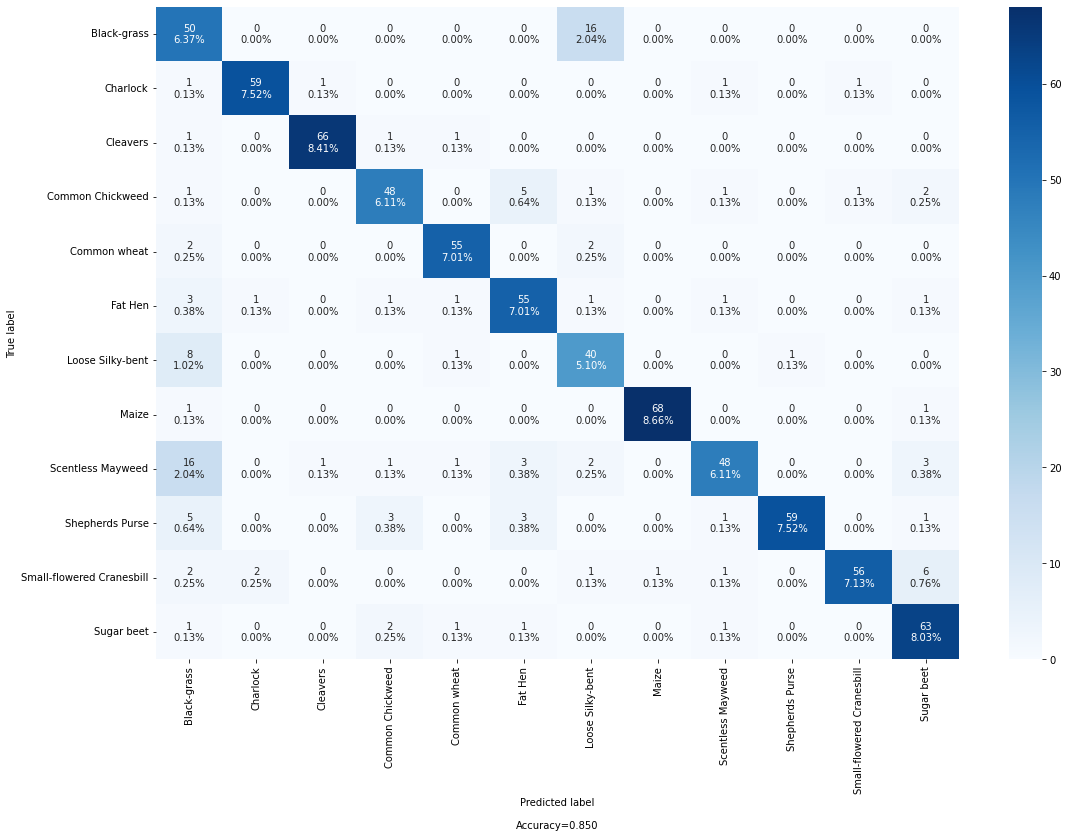

In [ ]:
y_pred2e=model2e.predict(X_test)

print(y_pred2e[0])
#Let's predict using default threshold
y_pred2e = (y_pred2e > 0.5)
print(y_pred2e[0])

ypred2e=[]
for i in y_pred2e:
    ypred2e.append(sorted(classnames)[np.argmax(i)])
print(ypred2e[0])

cm2=confusion_matrix(ytest, ypred2e)
categories = sorted(classnames)
make_confusion_matrix(cm2,
                      categories=categories, 
                      cmap='Blues',
                      figsize=(18,12))

Let's explore other metrics. We've tried accuracy. How about F1 or recall or precision?

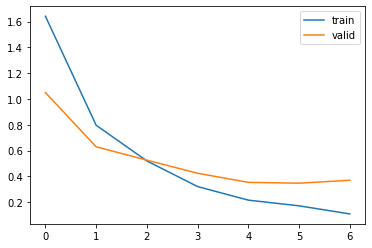

In [ ]:
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision_m = precision(y_true, y_pred)
    recall_m = recall(y_true, y_pred)
    return 2*((precision_m*recall_m)/(precision_m+recall_m+K.epsilon()))

modelre=better_model_maker(metric=recall)

loadedre=False
takere_logger = CSVLogger('takere.csv', separator=',', append=False)

if os.path.isfile("./takere.csv"):
  hist=pd.read_csv("./takere.csv")
  loadedre=True
else: takere=modelre.fit(X_train, y_train, batch_size=32, epochs=10,verbose=1, validation_data=(X_valid, y_valid),callbacks=[GarbageCollectorCallback(),es_cb,SessionClearCallback(), takere_logger])

if not loadedre: # Capturing learning history per epoch
  hist  = pd.DataFrame(takere.history)
  hist['epoch'] = takere.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.show();

[5.5389021e-10 1.8848100e-08 2.5801428e-09 1.7160999e-02 7.9393803e-10
 1.9211573e-05 1.3673322e-09 2.4426508e-05 9.7683126e-01 5.9599308e-03
 6.8671392e-07 3.5106225e-06]
[False False False False False False False False  True False False False]
Scentless Mayweed


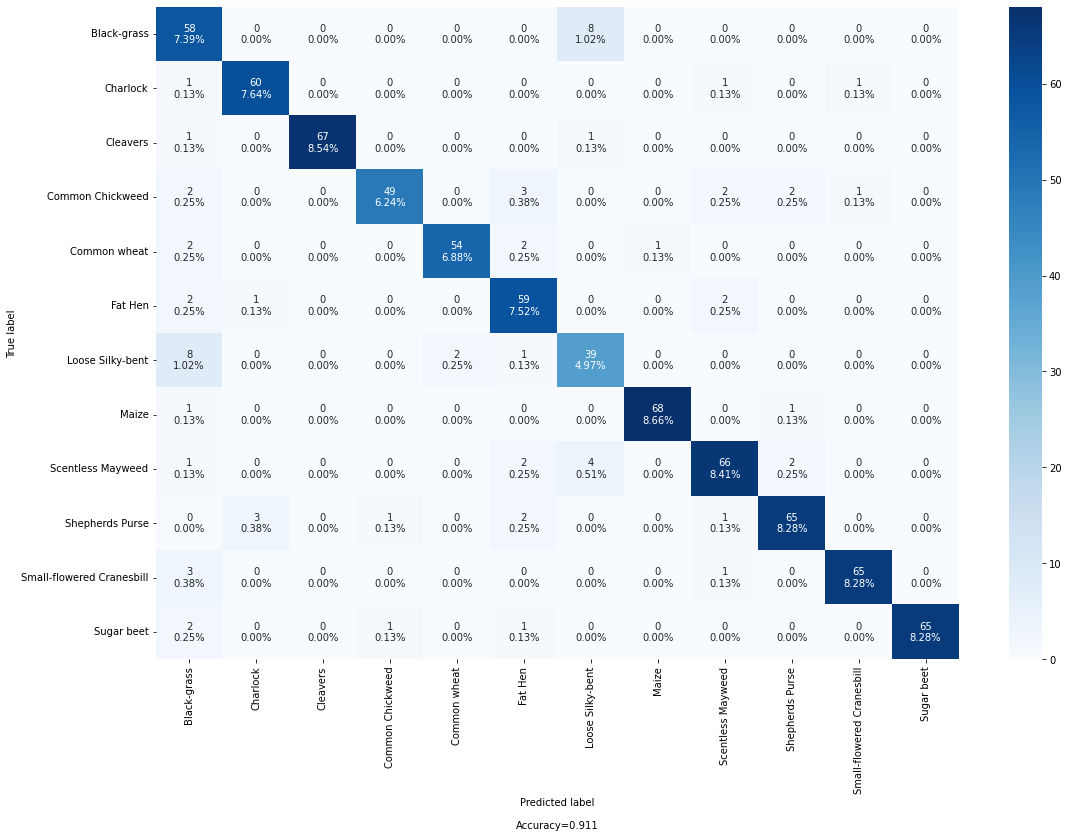

In [ ]:
y_predre=modelre.predict(X_test)

print(y_predre[0])
#Let's predict using default threshold
y_predre = (y_predre > 0.5)
print(y_predre[0])

ypredre=[]
for i in y_predre:
    ypredre.append(sorted(classnames)[np.argmax(i)])
print(ypredre[0])

cm3=confusion_matrix(ytest, ypredre)
categories = sorted(classnames)
make_confusion_matrix(cm3,
                      categories=categories, 
                      cmap='Blues',
                      figsize=(18,12))

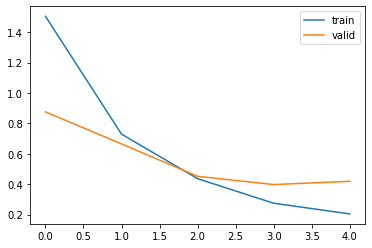

In [ ]:
modelpr=better_model_maker(metric=precision)

loadedpr=False
takepr_logger = CSVLogger('takepr.csv', separator=',', append=False)

if os.path.isfile("./takepr.csv"):
  hist=pd.read_csv("./takepr.csv")
  loadedpr=True
else: takepr=modelpr.fit(X_train, y_train, batch_size=32, epochs=10,verbose=1, validation_data=(X_valid, y_valid),callbacks=[GarbageCollectorCallback(),es_cb,SessionClearCallback(), takepr_logger])

if not loadedpr: # Capturing learning history per epoch
  hist  = pd.DataFrame(takepr.history)
  hist['epoch'] = takepr.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.show();

[1.34589655e-08 1.50532890e-06 1.57410170e-07 3.60201113e-03
 6.22256550e-07 8.79435447e-06 1.15907195e-08 2.78501830e-04
 9.79001224e-01 1.70712825e-02 4.31109811e-06 3.16075639e-05]
[False False False False False False False False  True False False False]
Scentless Mayweed


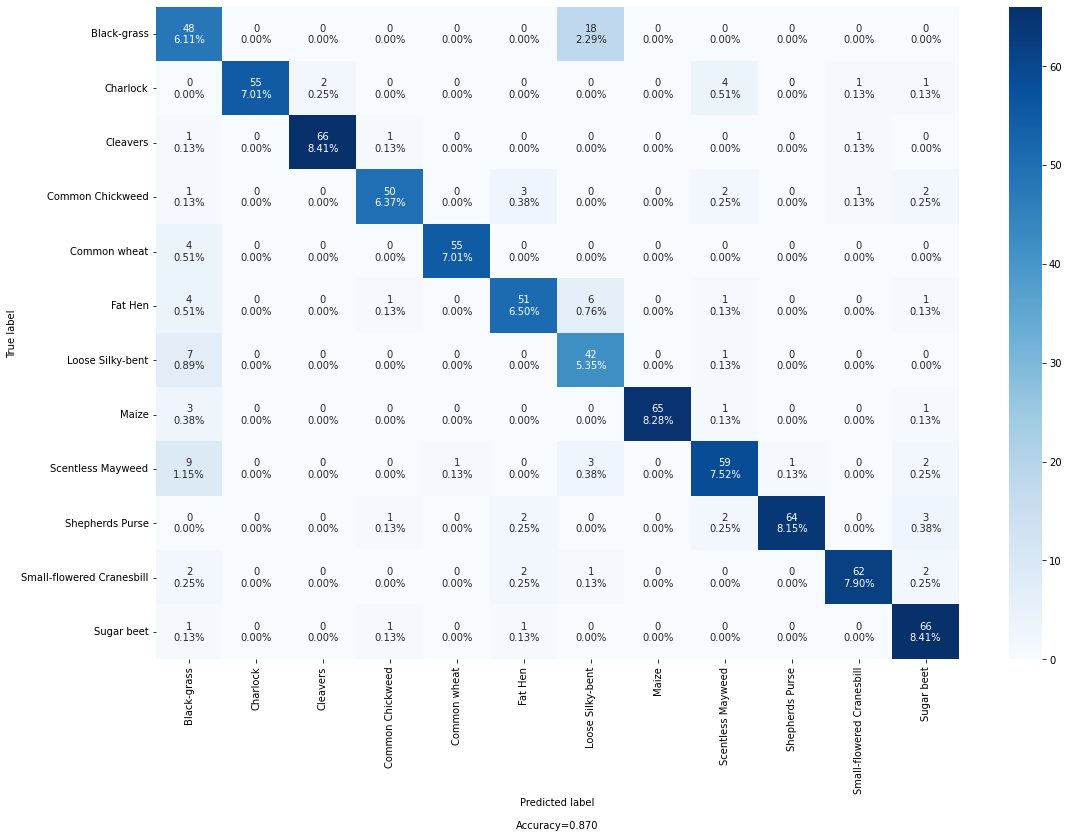

In [ ]:
y_predpr=modelpr.predict(X_test)

print(y_predpr[0])
#Let's predict using default threshold
y_predpr = (y_predpr > 0.5)
print(y_predpr[0])

ypredpr=[]
for i in y_predpr:
    ypredpr.append(sorted(classnames)[np.argmax(i)])
print(ypredpr[0])

cm3=confusion_matrix(ytest, ypredpr)
categories = sorted(classnames)
make_confusion_matrix(cm3,
                      categories=categories, 
                      cmap='Blues',
                      figsize=(18,12))

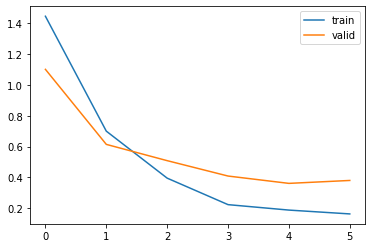

In [ ]:
modelf1=better_model_maker(metric=f1_score)

loadedf1=False
takef1_logger = CSVLogger('takef1.csv', separator=',', append=False)

if os.path.isfile("./takef1.csv"):
  hist=pd.read_csv("./takef1.csv")
  loadedf1=True
else: takef1=modelf1.fit(X_train, y_train, batch_size=32, epochs=10,verbose=1, validation_data=(X_valid, y_valid),callbacks=[GarbageCollectorCallback(),es_cb,SessionClearCallback(),takef1_logger])

if not loadedf1: # Capturing learning history per epoch
  hist  = pd.DataFrame(takef1.history)
  hist['epoch'] = takef1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.show();

[0.08281431 0.08541126 0.08104913 0.07921164 0.08356048 0.08233785
 0.08408087 0.0809085  0.08324911 0.095479   0.08134962 0.08054825]
[False False False False False False False False False False False False]
Black-grass


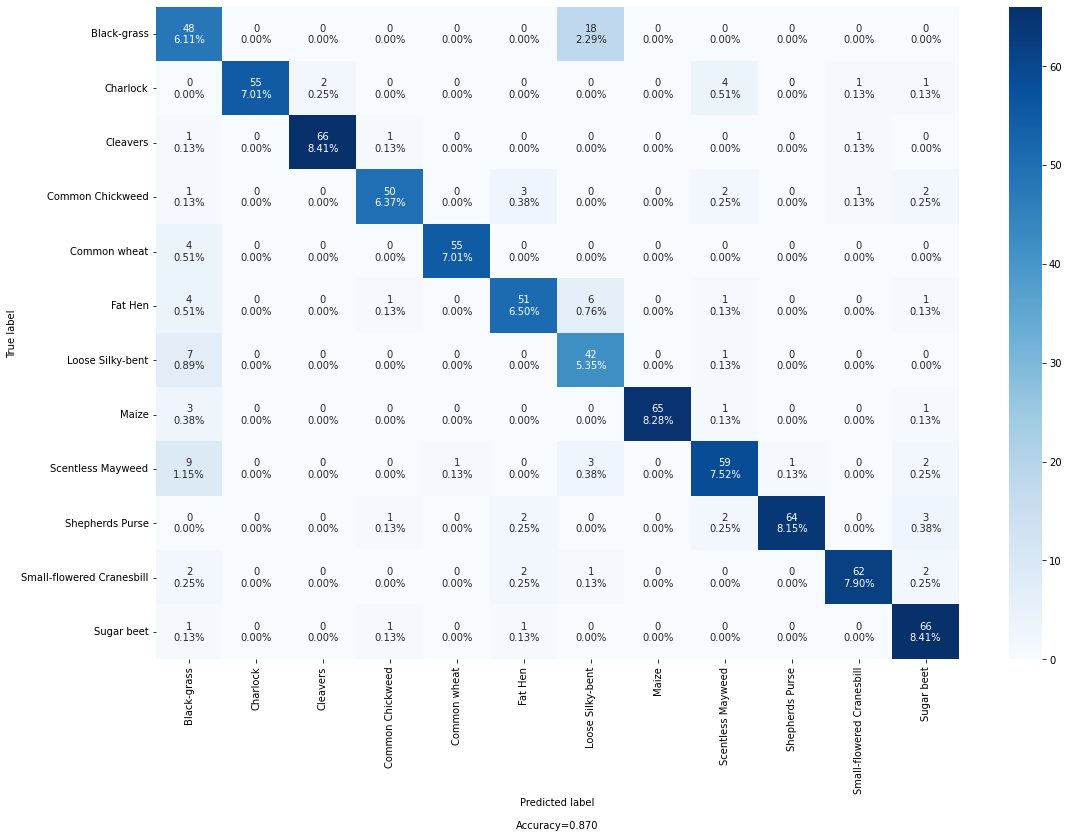

In [ ]:
y_predf1=modelf1.predict(X_test)

print(y_predf1[0])
#Let's predict using default threshold
y_predf1 = (y_predf1 > 0.5)
print(y_predf1[0])

ypredf1=[]
for i in y_predf1:
    ypredf1.append(sorted(classnames)[np.argmax(i)])
print(ypredf1[0])

cm4=confusion_matrix(ytest, ypredpr)
categories = sorted(classnames)
make_confusion_matrix(cm4,
                      categories=categories, 
                      cmap='Blues',
                      figsize=(18,12))

An recall metric actually gives us the best accuracy, and fixes the mistake in classification that black-grass is being classified as loose silky-bent. Not quite as good as our first model though.

It appears that CNNs learn very quickly, a learning rate of 0.001 is sufficient to train a model under 10 epochs with a batch size of 32. The model tends to overfit, so keeping complexities at a minimum is essential. One convolutional layer is sufficient. Average pooling is better for continuous or soft edges while max pooling is better for exponential gradients. That's why I only applied ave pooling after normalization. High dropout rates and leakyrelus were used to combat the overfitting. At best my model can predict the correct class of plant from a photo 91 % of the time. Further exploration would be to see if the initial gaussian blur was really necessary or not.